# Задание 1

В Google Colab для n = 2 000, 5 000, 10 000 : 
- Решить СЛАУ на numpy  (матрицы A и b размерности n сгенерить случайным образом), замерив время исполнения 
- Определить какую графическую карту для параллельных расчетов на PyTorch Вам предоставил Google Colab 
- Скопировать исходные A и b в PyTorch формате, решить СЛАУ параллельным способом на PyTorch, замерив время исполнения 
- Определить для какого n параллельное вычисление дает максимальное приращение 

Сохранить Colab Notebook в формате  PDF (Файл –Печать –Сохранить в PDF) и прислать мне на почту за время этого семинара.

Баллы за выполнение задания и сдачи в срок: 2 балла.
 
Будет плюсом: более мелкая сетка разбиения и построенный график (на баллы не влияет)

### 1.1 Решить СЛАУ на numpy, замерив время исполнения

Матрицы A и b размерности n сгенерить случайным образом.

In [ ]:
import numpy as np 
import time 

n = 2000

matrix1 = np.random.random([n, n]) 
matrix2 = np.random.random([n]) 

t_code = time.time()
np.linalg.solve(matrix1, matrix2)

runtime = time.time() - t_code
print("Runtime: {0:.3f} sec".format(runtime))

Runtime: 0.231 sec


In [ ]:
n = 5000

matrix1 = np.random.random([n, n]) 
matrix2 = np.random.random([n]) 

t_code = time.time()
np.linalg.solve(matrix1, matrix2)

runtime = time.time() - t_code
print("Runtime: {0:.3f} sec".format(runtime))

Runtime: 3.187 sec


In [ ]:
n = 10000

matrix1 = np.random.random([n, n]) 
matrix2 = np.random.random([n]) 

t_code = time.time()
np.linalg.solve(matrix1, matrix2)

runtime = time.time() - t_code
print("Runtime: {0:.3f} sec".format(runtime))

Runtime: 21.992 sec


### 1.2 Определить графическую карту 

Ту, которую для параллельных расчетов на PyTorch Вам предоставил Google Colab.

In [ ]:
import torch
print(torch.cuda.get_device_name(0))

Tesla K80


### 1.3 Решение СЛАУ в PyTorch

Скопировать исходные A и b в PyTorch формате, решить СЛАУ параллельным способом на PyTorch, замерив время исполнения.

In [ ]:
n = 2000

matrix1 = np.random.random([n, n]) 
matrix2 = np.random.random([n]) 

matrix1_converted = torch.from_numpy(matrix1).cuda() 
matrix2_converted = torch.unsqueeze(torch.from_numpy(matrix2), 1).cuda() 

t_code = time.time()
torch.solve(matrix2_converted, matrix1_converted) 

runtime = time.time() - t_code
print("Runtime: {0:.3f} sec".format(runtime))

Runtime: 0.040 sec


### 1.4 Определить n

Определить для какого n параллельное вычисление дает максимальное приращение. В первом задании необходимо замерить время решения на CPU и GPU для трех разных N, сравнить их, и написать, для какого N выигрыш в производительности максимален.

In [ ]:
n = [2000, 5000, 10000]

def func(n):
  # For GPU
  A_GPU = torch.rand([n, n], dtype=torch.float32).cuda() 
  b_GPU = torch.rand([n, 1], dtype=torch.float32).cuda() 
  t_code = time.time()
  x_GPU = torch.solve(b_GPU, A_GPU)
  runtime_GPU = time.time() - t_code

  # For CPU
  A_CPU = A_GPU.cpu().numpy()
  b_CPU = b_GPU.cpu().numpy()
  t_code = time.time()
  x_CPU = np.linalg.solve(A_CPU, b_CPU)
  runtime_CPU = time.time() - t_code

  res = "difference: " + str(round(abs(runtime_CPU - runtime_GPU), 3)) + " sec"
  if runtime_CPU > runtime_GPU:
    return "CPU is slower than GPU", res
  elif runtime_CPU < runtime_GPU:
    return "GPU is slower than CPU", res
  else:
    return "They are equal", res

for i in range(len(n)):
  print("For {0} result is {1} ".format(n[i], func(n[i])))

For 2000 result is ('CPU is slower than GPU', 'difference: 0.226 sec') 
For 5000 result is ('CPU is slower than GPU', 'difference: 2.919 sec') 
For 10000 result is ('CPU is slower than GPU', 'difference: 22.198 sec') 


# Задание 2

Вам необходимо сравнить есть ли существенная разница между двумя рейтингами на странице Кинопоиска “топ 250 фильмов” - https://www.kinopoisk.ru/lists/top250/?tab=all 

1. Нужно выгрузить необходимые данные с помощью веб-скрэпинга(без программирования) 
2. Загрузить все данные в Python 
3. Сравнить данные подходящими методами из лекции No2, указав для каждого используемого вами метода нулевую гипотезу, полученное значение p-value и ваш вывод 

Сохранить ColabNotebookв формате  PDF (Файл –Печать –Сохранить в PDF) и прислать мне на почту за время этого семинара 
Баллы за выполнение задания и сдачи в срок: 2 балла.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Temp/data.csv", names=["num", "name", "rate_1", "rate_2"])
df.head()

,num,name,rate_1,rate_2
0,1,Зеленая миля,9.1,8.9
1,2,Побег из Шоушенка,9.1,8.9
2,3,Властелин колец: Возвращение короля,8.6,8.8
3,4,Властелин колец: Две крепости,8.6,8.8
4,5,Властелин колец: Братство Кольца,8.6,8.8


![IMG_1306[2846].JPG](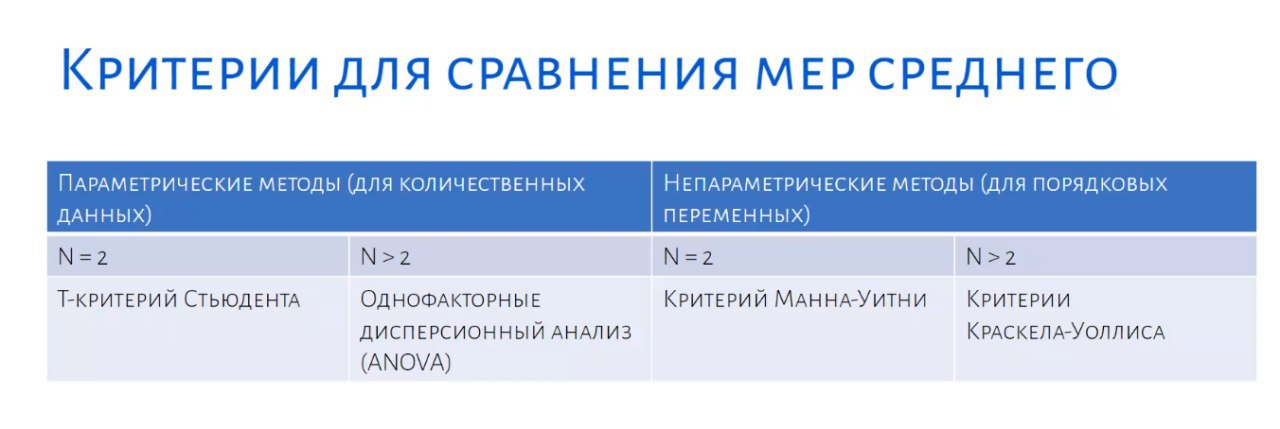)

Воспользуемся критерием Стьюдента доя количественных данных

**Шаг 1. Посмотрим на данные**

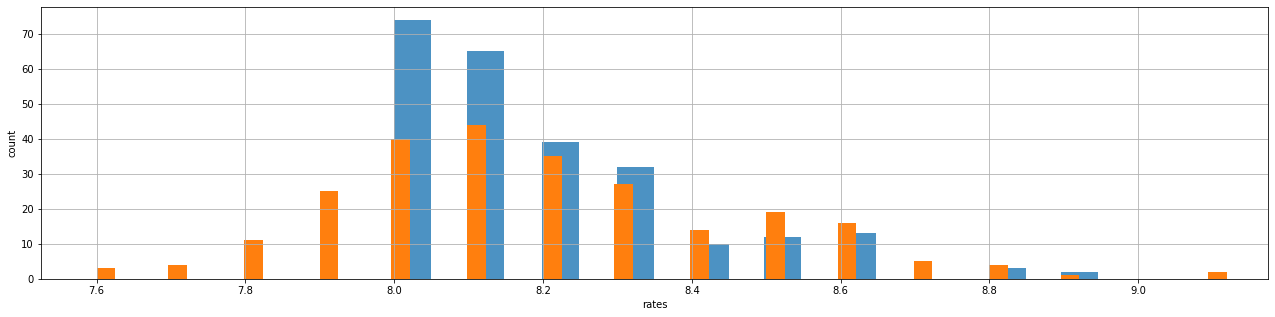

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(22, 5))
ax = fig.add_subplot(111)

n_bins = len(df)
ax.hist(df['rate_2'], bins=n_bins, width=0.05, alpha=0.8)
ax.hist(df['rate_1'], bins=n_bins, width=0.025)

ax.set_ylabel('count')
ax.set_xlabel('rates')
ax.grid()
plt.show()

**Шаг 2. Рассчитать среднее арифметическое, стандартное отклонение и количество данных в каждой группе.**

In [ ]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(df['rate_1'], df['rate_2'])
print('Statistics = %.3f, p = %.3f' % (stat, p)) # возвращает U-статистику Манна-Уитни, соответствующую выборке, и cвязанное значение p вероятности 

alpha = 0.05
if p > alpha:
	print('Fail to reject H0')
else:
	print('Reject H0')

Statistics = 31031.500, p = 0.446
Fail to reject H0


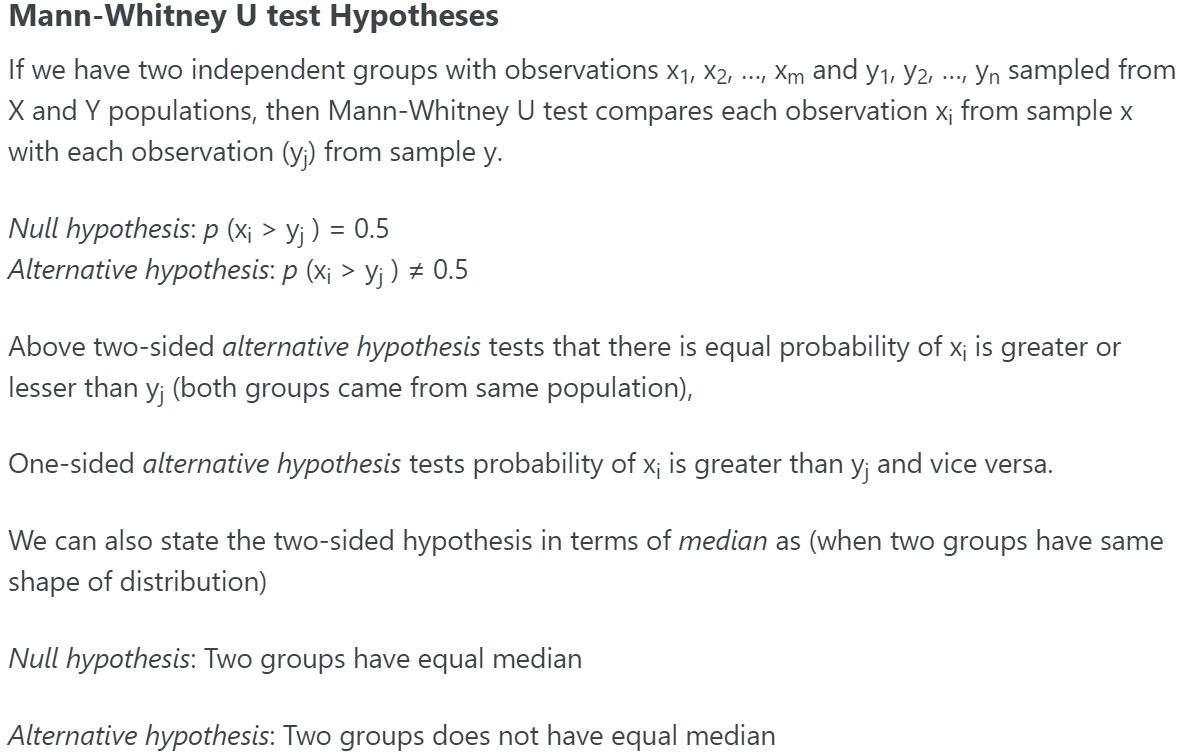

# Задание 3